# Analysis of Seattle AirBnB Open Data dataset

***NOTE: This is part of the first project "Write a Data Scientist Blog Post" of the UDACITY Nanodegree "Data Scientist". Please see README.md for details.***

## Imagine ...

... you want to visit Seattle, but you have no idea about the big and exciting city. As it is well known, a good starting point is crucial to explore a town and to have a great time. This is why one should spend a lot of time to find a good accommodation before booking the tickets for the trip.

To find a good accommodation in Seattle, we use the Seattle AirBnB Open Data dataset to answer the following questions
1. What is the best location in the city to explore Seattle?
2. What is the best time to travel to Seattle?
3. Can we use the host's profile to see if we choose a good host?
4. Can we predict the price of an accommodation based on some key indicators that are important for you?

In [43]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Get a feeling for the dataset

The dataset is available at https://www.kaggle.com/airbnb/seattle/data. It consists of 3 csv files that are
* listings.csv ... contains main information about hosts and the offered properties
* calendar.csv ... shows detailed availability of properties and prices for the year 2016
* reviews.csv .... detailed reviews (as full text) of properties

The datasets (.csv files) are part of this project.

In [44]:
listings = pd.read_csv('listings.csv')
calendar = pd.read_csv('calendar.csv')
reviews = pd.read_csv('reviews.csv')

Use the following lines of code to get a first idea of how the dataset looks like.

In [45]:
pd.options.display.max_columns = None
listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [46]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [47]:
listings.shape

(3818, 92)

In [48]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [49]:
calendar.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [50]:
# The number of rows is equal to the number of properties multiplied with days of a year 365
calendar.shape

(1393570, 4)

In [51]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [52]:
reviews.shape

(84849, 6)

## Question 1&2: Best place and time to stay in Seattle

Having a look on the listings, we see that Seattle has some districts. To choose the best one for you, we want to group the districts according to the list price. Here we assume that **the higher the price, the better the location** is... this is maybe wrong, but we neet to make some assumptions.

In [53]:
# Choose columns of interest
listings_tmp = listings[["neighbourhood_group_cleansed", "price"]]

In [54]:
# We are lucky, there are no columns with unset data --> no data cleaning necessary.
sum(listings_tmp.price.isna())

0

In [55]:
# Since the column "price" contains strings of the form "$XX.XX" --> convert to floats
# Use the following function for conversion
from re import sub

def price_to_float(df):
    '''
    This function checks if a column "price" is available and if it has string type entries.
    If so, the column is replaced by a new column with the same name but with entries converted
    to floats.
    '''
    # Quit for empty df
    if (df.shape[0] <= 0):
        return df
    
    if (len(df.columns[df.columns.str.match(r'(.*price.*)') == 1]) > 0):
        # There is a price, check the type is a string and exit if not
        if (type(df['price'][0]) != np.str):
            return df
    
    # Convert from string to float
    df = df.rename(columns={"price": "price_str"})
    price_to_float_lambda = lambda row: float(sub(r'[^\d.]', '', row)) if type(row) == np.str else row
    df['price'] = df.price_str.apply(price_to_float_lambda)
    df = df.drop(columns = ["price_str"])
    
    return df

In [56]:
listings_tmp = price_to_float(listings_tmp)
listings_tmp.head()

,neighbourhood_group_cleansed,price
0,Queen Anne,85.0
1,Queen Anne,150.0
2,Queen Anne,975.0
3,Queen Anne,100.0
4,Queen Anne,450.0


### Best place to go

In [57]:
# To get the best location (which we assume to be the "most expansive one"), get a list of
# all districts and the according price index.
neighbourhood_price = listings_tmp.groupby("neighbourhood_group_cleansed").mean().sort_values(by = "price", ascending = False)
neighbourhood_price

,price
neighbourhood_group_cleansed,
Magnolia,177.672131
Queen Anne,157.223729
Downtown,154.405660
West Seattle,141.359606
Cascade,140.101124
Capitol Hill,130.592593
Central Area,128.338753
Ballard,124.682609
Other neighborhoods,119.968514


In [58]:
neighbourhood_price.describe()

,price
count,17.000000
mean,119.838682
std,27.847598
min,83.278481
25%,93.639344
50%,119.968514
75%,140.101124
max,177.672131


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text xticklabel objects>)

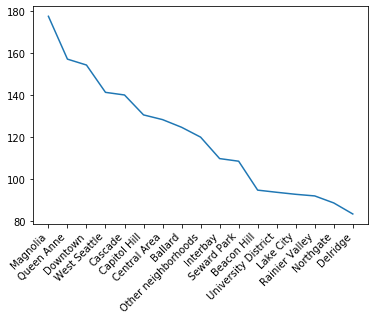

In [59]:
# Create some nice plots for the blog post.
plt.plot(neighbourhood_price)
plt.xticks(rotation=45, ha='right')
#plt.savefig('Q1_plot.png')

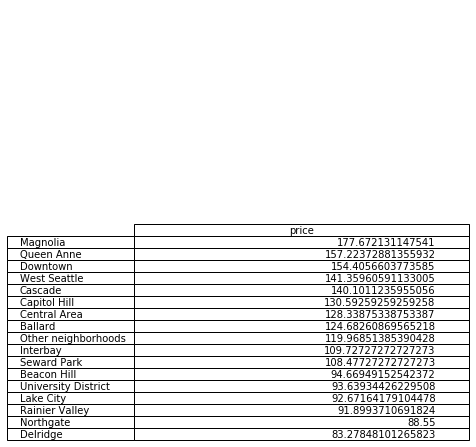

In [60]:
# Unfortunatelly, it is not that easy to make a nice plot of a table....
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

pd.plotting.table(ax = ax, data = neighbourhood_price)
#plt.savefig('Q1_table.png')

### Best time to go

To answer this question, we have a look on the calendar and check the dates the prices are lower.

In [61]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [62]:
# Convert price to floats and drop unneeded columns
calendar_tmp = price_to_float(calendar)
calendar_tmp = calendar_tmp.drop(columns = ["listing_id", "available"])

In [63]:
calendar_tmp.head()

,date,price
0,2016-01-04,85.0
1,2016-01-05,85.0
2,2016-01-06,NaN
3,2016-01-07,NaN
4,2016-01-08,NaN


([<matplotlib.axis.XTick at 0x1189deb8848>,
 <a list of 13 Text xticklabel objects>)

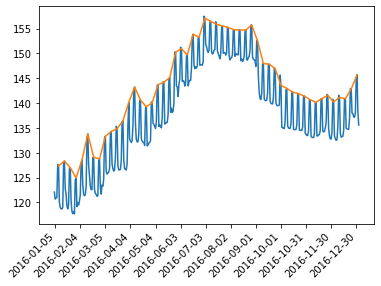

In [64]:
# Now, group by date and plot the prices.
# Note that the first date is 2016-01-04, which was a Monday. We use this to plot the prices for the
# weekends as well...
calendar_price = calendar_tmp.groupby("date").mean()
# Price all
plt.plot(calendar_price)
# Price weekends
plt.plot(calendar_price[5::7])
# Plot...
plt.xticks(calendar_price.index[1::30], rotation=45, ha='right')
#plt.savefig('Q1_time.png')

In [65]:
calendar_price.describe()

,price
count,365.000000
mean,137.901783
std,9.860142
min,117.685413
25%,132.446443
50%,136.731206
75%,146.930502
max,157.480000


In [66]:
# We see that there is a massive difference between prices at the weekend and during the week.
# Check how much this is
difference = calendar_price[5::7].values - calendar_price[2::7].values
np.mean(difference)

7.713178497717234

### Question 1&2 -- Conclusion

Having a look on the table and the description, the top 25% districts are 
* Magnolia
* Queen Anne
* Downtown
* West Seattle

So if money is no problem for you, get an accomodation there. The mean price is around $120, if this is more your budget, look for a place in e.g., 
* Ballard
* Interbay

The cheapest 25% districts cost you around $90, so go to e.g.,
* Rainier Valley
* Northgate
* Delridge

if you want to save some money !!

So furthermore, when is the best time to travel to Seattle? this question depends on what you think "best time" means for you.  
If you want to save money, don't go in the summer time!! It seems that the prices are the lowest at the beginning of the year and continuously increase until summer. In autumn, it gets cheaper again, but accomodations are still more expensive compared to the first months of the year.

In addition, if you want to save money, avoid weekends, since booking an accomodation during weekends approximately costs you $7.70 more than during the week. 

However, saving money is not the most important... if you want to party and enjoy the summer times, visit Seattle in July or August!! High prices indicate that Seattle is more frequented during this time, so this months are probably the most attractive ones.

## Question 3: When choosing an AirBnB host, what should you be aware of ?

To be honest, I have just booked an accomodation using AirBnB once in my life and I was a bit unlucky with my choice of the host...

Anyway, I very much like the idea of AirBnB and it's clear that the provider cannot guarantee that all hosts are nice. So lets give it another try, but this time, I will have a more detailed look on the hosts profile. Maybe, there are some indicators that show if the host is nice and the offered property is great?

For this, have a look on the correlations between reviews (which serves as an indicator for a good host) and
* if the host wrote something about him/herself ?
* is there a space or a summary
* host is superhost
* number of amenities
* number of reviews

In [67]:
# Drop all rows that has no reviews
listings_clean = listings[listings.number_of_reviews != 0]

In [68]:
# Set all columns of interest
columns_copy = ["number_of_reviews"]
count_string_list = ["amenities"]
string_to_bool = ["host_is_superhost"]
nonempty_to_bool = ["host_about", "space", "summary"]

In [69]:
# Use function to create df as required for further analysis
def prepare_data(df_base,
                 columns_copy, count_string_list, string_to_bool, nonempty_to_bool,
                 categories_to_dummies = False,
                 cleanup = False):
    '''
    Based on the df_base, this function returns a new DataFrame with adapted columns that can
    be used for statistics and further calculations.
    columns_copy ........... List of columns that is added to the new df
    count_string_list ...... List of columns, for each column the number of entries in str-list is counted
    string_to_bool ......... List of columns, for each column string-booleans are converted to integer
    nonempty_to_bool ....... List of coumns, for each column it is checked if entries are given
    categories_to_dummies .. Boolean to control if categorical variables are tranfered to dummies
    cleanup ................ If True, NaNs are filled with means
    '''
    df = pd.DataFrame()
    
    # Copy columns
    for col in columns_copy:
        df[col] = df_base[col]
    
    # Get number of entries of separated list
    for col in count_string_list:
        df["num_" + col] = df_base[col].apply(lambda row: len(row.split(",")))
        
    # Convert string booleans to real ones
    for col in string_to_bool:
        df[col] = df_base[col].apply(lambda row: row == "t")
        
    # Set True for nonempty entries
    for col in nonempty_to_bool:
        df["has_" + col] = df_base[col].notna()
        
    # Transform categorical variables
    if categories_to_dummies:
        # Add categories
        cat_vars = df.select_dtypes(include=['object']).copy().columns
        for var in cat_vars:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
        
    # Cleanup the data
    # If a column contains NaNs, one need to either fill the missing entries with
    # meaningful data (mean) or remove the column if the number of missing entries
    # is too high.
    if cleanup:
        num_vars = df.select_dtypes(include=['float', 'int']).columns
        for col in num_vars:
            if (sum(df[col].isna())/df.shape[0] > 0.75):
                df.drop(columns = col, inplace = True)
            else:
                df[col].fillna((df[col].mean()), inplace=True)
        
    return df        

In [70]:
listings_review = prepare_data(listings_clean, 
                               columns_copy, count_string_list, string_to_bool, nonempty_to_bool,
                               False, False)
listings_review.head()

,number_of_reviews,num_amenities,host_is_superhost,has_host_about,has_space,has_summary
0,207,10,False,True,True,False
1,43,16,True,True,True,True
2,20,21,False,True,True,True
4,38,13,False,True,True,True
5,17,6,False,True,True,True


In [71]:
# Add column with min(review_*)
listings_review_tmp = listings_clean[["review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location"]]
listings_review["review"] = listings_review_tmp.min(axis=1)

# Have a look on the correlation
listings_review.corr()
#import seaborn as sns
#sns.heatmap(listings_review.corr(), annot=True, fmt=".2f");

,number_of_reviews,num_amenities,host_is_superhost,has_host_about,has_space,has_summary,review
number_of_reviews,1.000000,-0.004717,0.232142,0.179687,0.151991,-0.159641,0.082813
num_amenities,-0.004717,1.000000,0.091282,0.070468,0.100902,0.072464,0.134637
host_is_superhost,0.232142,0.091282,1.000000,0.128484,0.075804,0.044783,0.250823
has_host_about,0.179687,0.070468,0.128484,1.000000,0.236514,-0.107828,0.057994
has_space,0.151991,0.100902,0.075804,0.236514,1.000000,-0.080469,0.035205
has_summary,-0.159641,0.072464,0.044783,-0.107828,-0.080469,1.000000,0.059902
review,0.082813,0.134637,0.250823,0.057994,0.035205,0.059902,1.000000


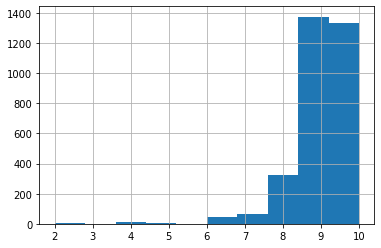

In [72]:
# The histogram shows that people tend to give very good reviews.
listings_review.review.hist()

### Question 3 -- Conclusion

It seems that none of the selected features indicates that the host is good. This is maybe because of a bad choice of features. However, one can see that guests generally give very good reviews, so the correlations between some of the features would maybe be more significant if there would be more bad reviews.

## Question 4: Can we use the data to predict a price?

When searching for a nice place in Seattle, it's very hard for people that are not familiar with the place to check if the price for an offered accomodation is fair. This is why we want a model that predicts the price based on other features.

In [73]:
# Remove all entries that cannot be used for prediction of the price
# In addition, transform price to floats and add a common review column
listings = price_to_float(listings.dropna(subset=["price"], axis = 0))

listings_review_tmp = listings[["review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location"]]
listings["review"] = listings_review_tmp.min(axis=1)

In [74]:
# Use the function prepare_data to collect some features that might be interesting 
# for prediction of the price.
# Note that there are many columns with free text or dates that would massively increase the number
# of columns when transforming categorial data --> remove these columns
count_string_list = ["amenities", "host_verifications"]
string_to_bool = []
nonemtpy_to_bool = ["host_about", "space", "summary",
                    "neighborhood_overview", "notes", "transit",
                    "description", "security_deposit", "cleaning_fee", "extra_people"]

# Just select columns with interesting information (the name of the accomodation is uninteresting)
# as well as these that do not bias the prediction (as montly_price, ...).
# Furthermore, remove dates and location information as city, state, since we just stay in Seattle.
columns_copy = listings.columns.drop(["price", "weekly_price", "monthly_price", 
                        "name", "host_location", "host_name",
                        "city", "state", "zipcode", "market", "street", "smart_location",
                        "country", "country_code", "jurisdiction_names",
                        "neighbourhood", "neighbourhood_cleansed",
                        "license",
                        "host_since", "last_scraped", "calendar_last_scraped", "first_review", "last_review"])

# Drop columns set above
columns_copy = columns_copy.drop(count_string_list)
columns_copy = columns_copy.drop(string_to_bool)
columns_copy = columns_copy.drop(nonemtpy_to_bool)

# drop further unneeded columns as url, ids, ...
import re
url_list = listings.columns[listings.columns.str.match(r'(.*url.*)') == 1]
id_list = listings.columns[listings.columns.str.match(r'(.*id.*)') == 1]
rate_list = listings.columns[listings.columns.str.match(r'(.*rate.*)') == 1]

columns_copy = columns_copy.drop(url_list)
columns_copy = columns_copy.drop(id_list)
columns_copy = columns_copy.drop(rate_list)

In [75]:
# Choose feature space and cleanup
X = prepare_data(listings, 
                 columns_copy, count_string_list, string_to_bool, nonemtpy_to_bool,
                 True, True)
y = listings.price

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Let us use the very nice and useful function from the Udacity lesson that uses cutoffs to
# reduces the impact of overfitting and gives us a nice visualization of the number of features
# vs. r2 score.
def find_optimal_model(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

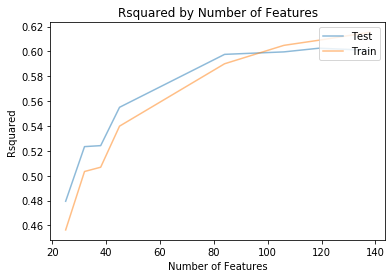

In [77]:
# Find the optimal model
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 15]
r2_scores_test, r2_scores_train, model, X_train, X_test, y_train, y_test = find_optimal_model(X, y, cutoffs)

In [78]:
# And the achieved r2 score on the test set using the optimal model is....
y_test_preds = model.predict(X_test)
r2_score(y_test, y_test_preds)

0.6025692984573163

### Question 4 -- Conclusion

Using most of the features in the dataset, we can find a model that can be used to predict the price of an accomodation. However, the r2 score (currently 0.603) is still far from perfect. Some ideas to improve the model are the following:
* Add the date to the model: As we saw in the first question, the price depends on the season when the accomodation can be booked. This has currently not been considered for the sake of simplicity.
* Add the rates to the model: Again, for the sake of simplicity, the rates (that are strings) can be modified such that they can be used for the prediction.
* Use the detailed review columns. In the above model, the min(review_*) has been used to simplify the values. Maybe it makes sense to keep the review columns as thy are?